In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from neurodynex.hopfield_network import network, pattern_tools, plot_tools
import numpy


In [2]:
# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C', 'S', 'X', 'Y', 'Z']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape


the alphabet is stored in an object of type: <class 'dict'>


In [3]:
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])



letters are patterns of size: (10, 10). Create a network of corresponding size


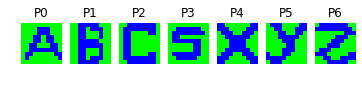

In [4]:
# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)



In [5]:
# store the patterns
hopfield_net.store_patterns(pattern_list)

In [6]:
# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(abc_dictionary['A'], nr_of_flips=8)
hopfield_net.set_state_from_pattern(noisy_init_state)

In [7]:
# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

In [8]:
# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

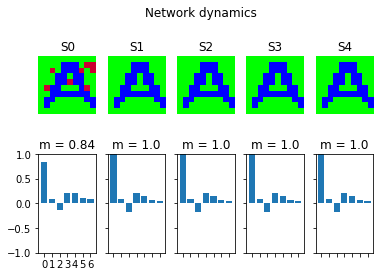

In [9]:
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")